# Can you estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

## 💪 Competition challenge
Create a report that covers the following:

1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 
3. Investigate which variables are better predictors of age for abalones.

In [160]:
import pandas as pd
abalone = pd.read_csv('abalone.csv')
abalone

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [161]:
abalone.dtypes

sex            object
length        float64
diameter      float64
height        float64
whole_wt      float64
shucked_wt    float64
viscera_wt    float64
shell_wt      float64
rings           int64
age           float64
dtype: object

#### Explore general statistics of the data

In [162]:
abalone.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


#### Ckeck for any missing data

In [163]:
abalone.isna().sum()

sex           0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
rings         0
age           0
dtype: int64

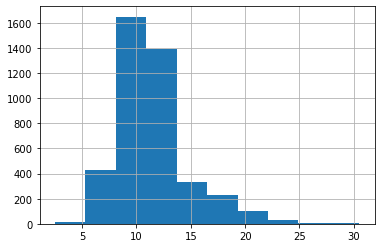

In [164]:
abalone["age"].hist();

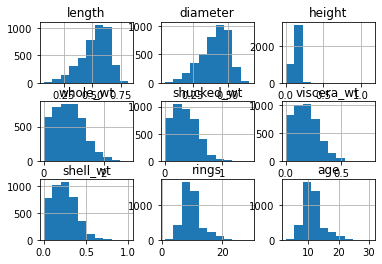

In [165]:
abalone.hist();

<AxesSubplot:>

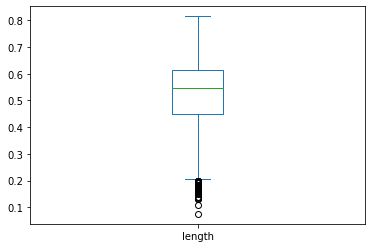

In [166]:
abalone["length"].plot(kind="box")

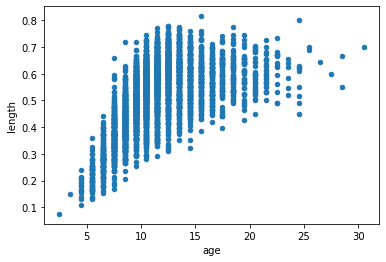

In [167]:
abalone.plot(kind="scatter", x='age', y='length');

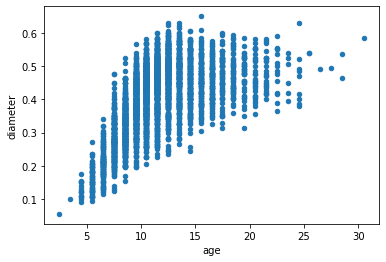

In [168]:
abalone.plot(kind="scatter", x='age', y='diameter');

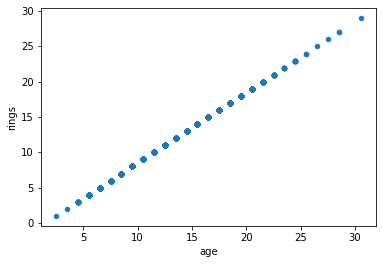

In [169]:
abalone.plot(kind="scatter", x='age', y='rings');

In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Data preprocessing

Convert categorical columns into numeric representation

In [171]:
abalone = pd.get_dummies(abalone)
abalone.head()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0,1,0


# Split the dataset

In [172]:
X = abalone.drop(columns=["age","rings"])
y = abalone["age"]

In [173]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, train_size=0.8, random_state=42, shuffle=True)

In [174]:
train_X.shape

(3341, 10)

In [175]:
train_y.shape

(3341,)

### Scale the data for better prediction accuracy

In [176]:
scaler = MinMaxScaler(feature_range=(0,1))

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [177]:
train_X[:3]

array([[0.64189189, 0.65546218, 0.11061947, 0.23729414, 0.19300605,
        0.17906517, 0.2077728 , 0.        , 1.        , 0.        ],
       [0.54054054, 0.50420168, 0.08849558, 0.17761643, 0.16980498,
        0.11915734, 0.13801694, 0.        , 1.        , 0.        ],
       [0.31081081, 0.28571429, 0.0619469 , 0.05188596, 0.03866846,
        0.04344964, 0.04334828, 1.        , 0.        , 0.        ]])

In [178]:
test_X[:3]

array([[0.71621622, 0.67226891, 0.14159292, 0.39011865, 0.28244788,
        0.39631336, 0.3223717 , 0.        , 0.        , 1.        ],
       [0.69594595, 0.64705882, 0.13274336, 0.30830529, 0.25958305,
        0.28242265, 0.24265072, 0.        , 0.        , 1.        ],
       [0.65540541, 0.65546218, 0.17256637, 0.34673278, 0.20443847,
        0.29493088, 0.33233682, 1.        , 0.        , 0.        ]])

# Model Training

In [179]:
model = LinearRegression(n_jobs=-1)

In [180]:
model.fit(train_X, train_y)

LinearRegression(n_jobs=-1)

# Model Evaluation

In [183]:
preds = model.predict(test_X)

In [189]:
accuracy = model.score(test_X, test_y)
accuracy

0.5484132854012416

In [248]:
preds = model.predict(test_X)
preds = pd.Series(preds, index=test_y.index, name="Predictions")

In [254]:
evaluation_df = pd.DataFrame(data={"actual": test_y, "prediction": preds})

In [255]:
evaluation_df.head(2)

,actual,prediction
866,10.5,13.250000
1483,9.5,11.730469


In [260]:
mean_absolute_error(test_y, preds)

1.5928809061004785